<a href="https://colab.research.google.com/github/rracha/LLM_UDEMY_LEARNING/blob/main/WK3_D2_Ravi_Calling_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EditHugging Face's pipeline function supports a wide variety of task types. Here are the main categories and specific tasks you can pass:
**Text Processing Tasks**

"text-classification" or "sentiment-analysis" - Classify text into categories
"token-classification" or "ner" - Named Entity Recognition
"question-answering" - Answer questions based on context
"fill-mask" - Fill in masked tokens in text
"summarization" - Generate text summaries
"translation" - Translate between languages (e.g., "translation_en_to_fr")
"text-generation" - Generate continuation of text
"text2text-generation" - Text-to-text generation tasks
"feature-extraction" - Extract embeddings/features from text
"zero-shot-classification" - Classify text without training examples
"conversational" - Chatbot/dialogue systems

**Audio Tasks**

"text-to-speech" or "tts" - Convert text to speech
"automatic-speech-recognition" or "asr" - Convert speech to text
"audio-classification" - Classify audio clips
"voice-activity-detection" - Detect speech in audio
"audio-to-audio" - Audio transformation tasks

**Vision Tasks**

"image-classification" - Classify images
"object-detection" - Detect objects in images
"image-segmentation" - Segment images
"image-to-text" - Generate captions for images
"text-to-image" - Generate images from text descriptions
"depth-estimation" - Estimate depth from images
"zero-shot-image-classification" - Classify images without training examples

**Multimodal Tasks**

"visual-question-answering" - Answer questions about images
"document-question-answering" - Answer questions about documents
"image-to-image" - Transform images

***Tabular/Structured Data***

"tabular-classification" - Classify tabular data
"tabular-regression" - Regression on tabular data

In [ ]:
from huggingface_hub import login
from google.colab import userdata
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import torch

In [ ]:
hf_token = userdata.get('HK_TOKEN')
login(token= hf_token)

In [ ]:
# Sentiment Analysis

classifier = pipeline("sentiment-analysis", device="cuda", model = "nlptown/bert-base-multilingual-uncased-sentiment")
result = classifier("I'm super excited to be on the way to LLM mastery!")
print(result)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda


[{'label': '5 stars', 'score': 0.6633583307266235}]


In [ ]:
#named entity recogniztion
ner = pipeline("ner", device="cuda", model = "dslim/bert-base-NER")
result = ner("Paris is the capital of france")
for entity in result:
  print(entity['word'])

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda


Paris


In [ ]:
summarizer1 = pipeline( model = "sshleifer/distilbart-cnn-12-6")
text = """The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing (NLP).
It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering, among others.
It's an extremely popular library that's widely used by the open-source data science community.
It lowers the barrier to entry into the field by providing Data Scientists with a productive, convenient way to work with transformer models.
"""
result = summarizer1(text, max_length=130, min_length=30, do_sample=False)
print(result[0]['summary_text'])

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda:0
Your max_length is set to 130, but your input_length is only 98. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


 The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing . It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering .


In [ ]:
# text summarization
text = """The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing (NLP).
It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering, among others.
It's an extremely popular library that's widely used by the open-source data science community.
It lowers the barrier to entry into the field by providing Data Scientists with a productive, convenient way to work with transformer models.
"""
summarizer = pipeline("summarization",  model = "facebook/bart-large-cnn")
result = summarizer(text, max_length=130, min_length=30, do_sample=False)
print(result[0]['summary_text'])

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Your max_length is set to 130, but your input_length is only 98. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing (NLP) It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

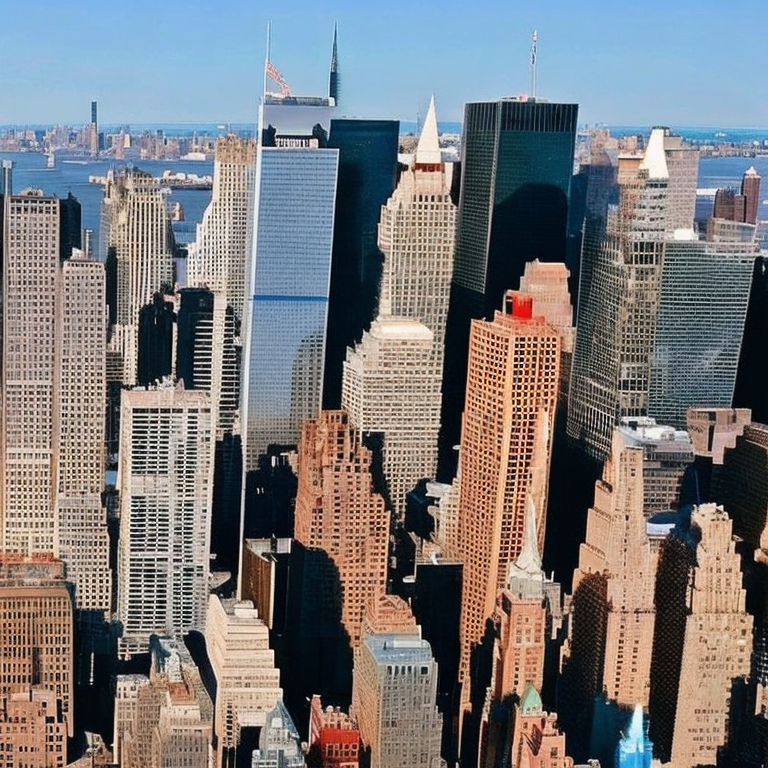

In [ ]:
# Image Generation

image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
    ).to("cuda")

text = "visitng places of newyork city and its names"
image = image_gen(prompt=text).images[0]
image

In [ ]:
# Translation

translator = pipeline("translation_en_to_fr")
result = translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Les Data Scientists ont été vraiment étonnés par la puissance et la simplicité de l'API du pipeline HuggingFace.


In [ ]:
# Audio Generation

synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts")

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)

speech = synthesiser("Hi to an artificial intelligence engineer, on the way to mastery!", forward_params={"speaker_embeddings": speaker_embedding})

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])
Audio("speech.wav")

Device set to use cpu


Generating validation split: 0 examples [00:00, ? examples/s]

NotImplementedError: Loading a dataset cached in a LocalFileSystem is not supported.